In [187]:
# pip install feature_engine

In [54]:
import pandas as pd  #Pandas library for data manipulation and analysis.
from sklearn.model_selection import train_test_split #used to split the dataset into training and testing subsets.
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # used to build and evaluate the predictive models.
from sklearn.pipeline import Pipeline #used to create a pipeline of data preprocessing and modeling steps
from sklearn.preprocessing import MinMaxScaler #used to standardize the input features and encode categorical features, respectively
from sklearn.compose import ColumnTransformer #used to apply different preprocessing steps to different columns of the input data.
from sklearn.impute import SimpleImputer # used to fill missing values in the input data
from feature_engine.outliers import Winsorizer # used to apply different preprocessing steps to different columns of a Pandas DataFrame
from sklearn.preprocessing import OneHotEncoder # used to encode categorical features as one-hot vectors
from sklearn.metrics import r2_score #used to evaluate the performance of the predictive models
import joblib #used to save and load trained models as binary files.
import pickle #used to save and load trained models as binary files.
import numpy as np #for numerical computations
import matplotlib.pyplot as plt #for data visualization
import sweetviz

In [251]:
# import pyodbc #pyodbc is a Python library that provides an interface for connecting to and 
# #interacting with databases using ODBC (Open Database Connectivity)

# conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
#                       'Server=LAPTOP-F819LJM9\SQLEXPRESS;'
#                       'Database=digitmg;'
#                       'Trusted_Connection=yes;')

In [2]:
# SQL Integration
from sqlalchemy import create_engine
from urllib.parse import quote 

user_name = 'root'
database = 'amerdb'
your_password = 'dba@123#'
engine = create_engine(f'mysql+pymysql://{user_name}:%s@localhost:3306/{database}' % quote(f'{your_password}'))
# Load the offline data into Database 
startup = pd.read_csv('50_Startups.csv')
# # adver.info()

In [3]:
startup.to_sql('startup', con = engine, if_exists='replace', chunksize=1000, index = False)

50

In [4]:
df = pd.read_sql_query('SELECT * FROM startup', engine)

In [5]:
df.head() # display first 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# Perform univariate analysis
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [7]:
# Perform bivariate analysis
corr = df.corr()
print(corr)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [ ]:
# AutoEDA
# Automated Libraries
# import sweetviz
my_report = sweetviz.analyze([df, "df"])
my_report.show_html('Report.html')

In [8]:
# check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [20]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [21]:
X = df.iloc[:,0:4] 
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [23]:
Y = df['Profit']

In [24]:
numeric_features = X.select_dtypes(exclude = ['object']).columns

numeric_features

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [25]:
num_pipeline = Pipeline([('impute', SimpleImputer(strategy = 'mean')), ('scale', MinMaxScaler()) ])

In [26]:
categorical_features = ['State']

categorical_features

['State']

Convert Categorical data "State" to Numerical data using OneHotEncoder

DataFrameMapper is used to map the given Attribute

In [27]:
categ_pipeline = Pipeline([('encoding', OneHotEncoder(sparse_output=False))])

Using ColumnTransfer to transform the columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

In [28]:
preprocess_pipeline = ColumnTransformer([('numerical', num_pipeline, numeric_features),('categorical', categ_pipeline, categorical_features)])

In [29]:
imp_enc_scale = preprocess_pipeline.fit(X)  # Pass the raw data through pipeline

imp_enc_scale

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', MinMaxScaler())]),
                                 Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['State'])])

In [30]:
joblib.dump(imp_enc_scale, 'imp_enc_scale')

['imp_enc_scale']

In [31]:
import os 
os.getcwd()

'f:\\04_studymaterial keys\\lasso_ridge'

In [32]:
df1 = pd.DataFrame(imp_enc_scale.transform(X), columns =  imp_enc_scale.get_feature_names_out()) # Clean and processed data

In [34]:
df1.describe()

,numerical__R&D Spend,numerical__Administration,numerical__Marketing Spend,categorical__State_California,categorical__State_Florida,categorical__State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.445854,0.533345,0.447292,0.340000,0.320000,0.340000
std,0.277608,0.213286,0.259208,0.478518,0.471212,0.478518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241527,0.399260,0.274066,0.000000,0.000000,0.000000
50%,0.441799,0.543661,0.450876,0.000000,0.000000,0.000000
75%,0.614474,0.712221,0.634759,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df1.iloc[:,0:3].columns

Index(['numerical__R&D Spend', 'numerical__Administration',
       'numerical__Marketing Spend'],
      dtype='object')

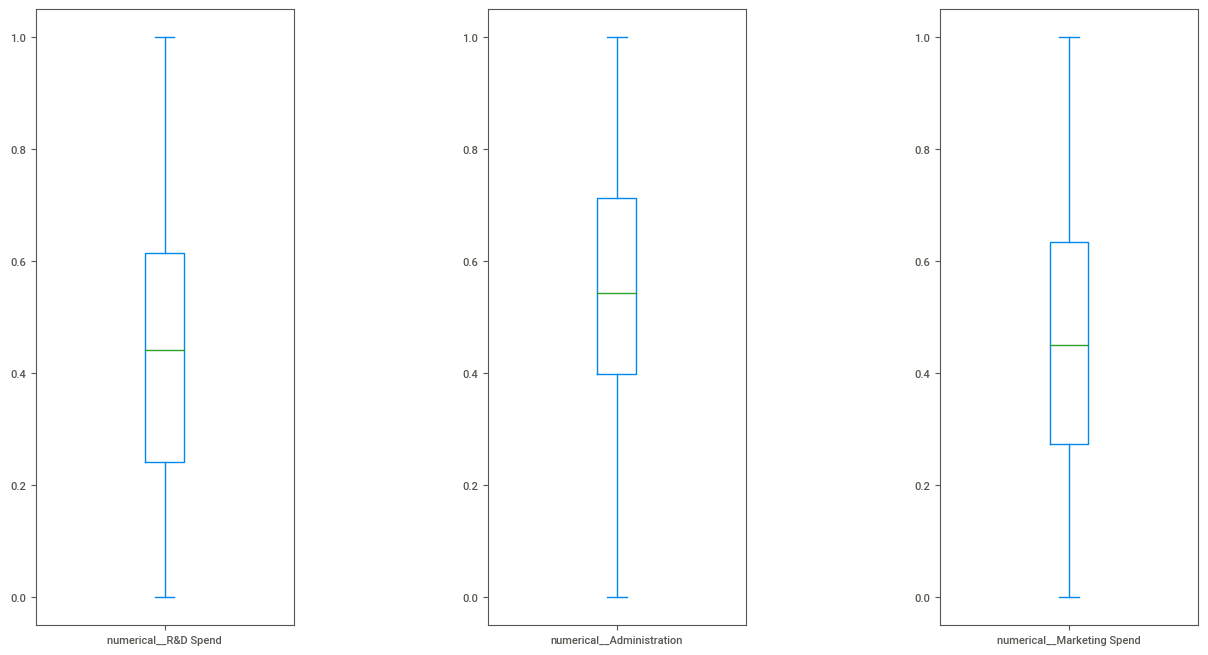

In [37]:
# Multiple boxplots in a single visualization.
#Columns with larger scales affevt other columns.
#Below code ensures each column gets its own y-axis.
# pandas plot() function with parameters kind ='box' and subplots = True

df1.iloc[:,0:3].plot(kind ='box', subplots = True, sharey = False, figsize = (15, 8))

''' sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''

#increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)# ws is the width of the padding between subplots,as the fraction of average axis width.
plt.show()

In [39]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundaries or
                    tail = 'both', # cap left,right or both tails
                    fold = 1.5,
                    variables = list(df1.iloc[:,0:3].columns))

# Fit the data
winz_data = winsor.fit(df1[list(df1.iloc[:,0:3].columns)])

#save the pipeline
joblib.dump(winz_data, 'winsor')

df1[list(df1.iloc[:,0:3].columns)] = winz_data.transform(df1[list(df1.iloc[:,0:3].columns)])

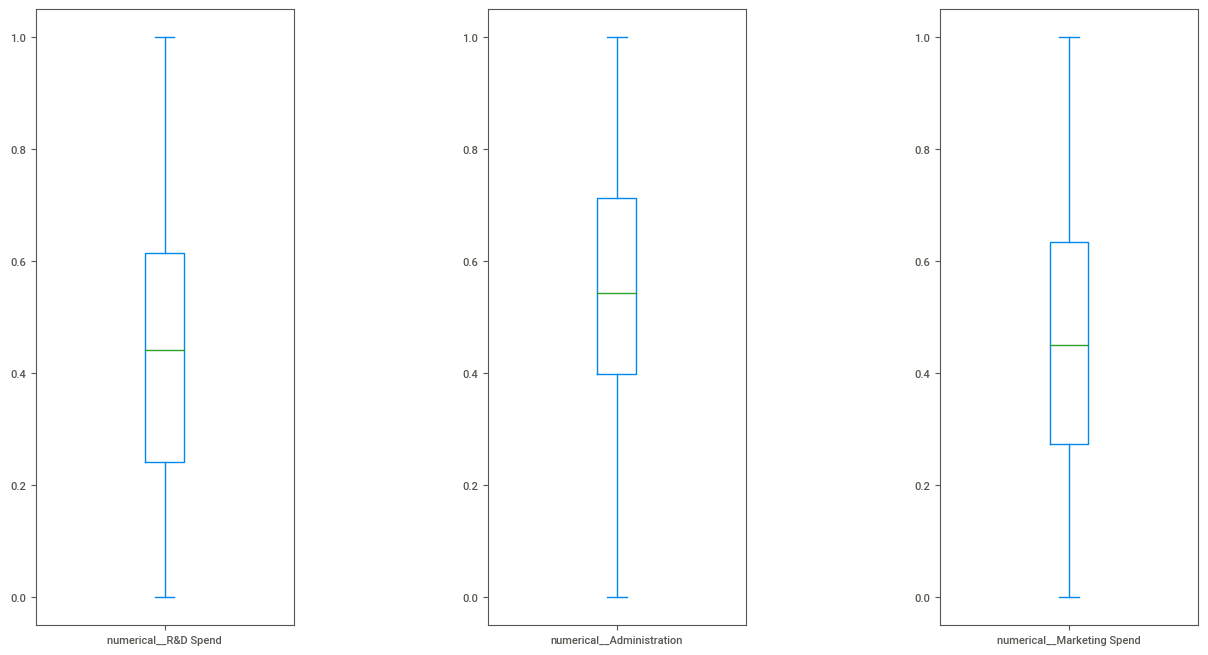

In [40]:
df1.iloc[:,0:3].plot(kind ='box', subplots = True, sharey = False, figsize = (15, 8))

''' sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''

#increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)# ws is the width of the padding between subplots,as the fraction of average axis width.
plt.show()

In [41]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# train_test_split is used to split the data into training and testing sets

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, Y, test_size = 0.2, random_state = 0)

In [44]:
X_train.shape

(40, 6)

In [45]:
X_test.shape

(10, 6)

In [46]:
# Fit a linear regression model
regressor = LinearRegression()

In [47]:
regressor.fit(X_train, Y_train)

LinearRegression()

Evaluate the model

In [48]:
# Evaluate the model with train data

pred_train = regressor.predict(X_train)  # Predict on train data

pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [49]:
# Predict on test set and evaluate performance
y_pred = regressor.predict(X_test)
r2_score_linear = r2_score(Y_test, y_pred)

In [50]:
# Fit a Lasso regression model with L1 regularization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [51]:
# Predict on test set and evaluate performance
y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(Y_test, y_pred_lasso)

In [52]:
# Fit a Ridge regression model with L2 regularization
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.01)

In [53]:

# Predict on test set and evaluate performance
y_pred_ridge = ridge.predict(X_test)
r2_score_ridge = r2_score(Y_test, y_pred_ridge)

In [55]:
 # Create an instance of the Elastic Net model
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [56]:
# Fit the model on the training data
enet.fit(X_train, Y_train)

ElasticNet(alpha=0.1)

In [57]:
# Predict on the test data
y_pred = enet.predict(X_test)

In [58]:
# Evaluate the model performance
r2_score_elastic_net = r2_score(Y_test, y_pred )


In [59]:
# Print R-squared scores for each model
print('Linear Regression R-squared:', r2_score_linear)
print('Lasso Regression R-squared:', r2_score_lasso)
print('Ridge Regression R-squared:', r2_score_ridge)
print('ElasticNet R-squared:', r2_score_elastic_net)

Linear Regression R-squared: 0.9347068473282423
Lasso Regression R-squared: 0.9347085735540256
Ridge Regression R-squared: 0.9331758725071483
ElasticNet R-squared: 0.7254781470772345


GridSearchCV is a method in scikit-learn that allows you to search over a grid of hyperparameters for the best combination of parameters for a given model

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Lasso Regression
# from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [62]:
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(X_train, Y_train)

C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+09, tolerance: 6.011e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+09, tolerance: 5.722e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [63]:
lasso_reg.best_params_
lasso_reg.best_score_

0.8637977791978464

In [64]:
y_pred_lasso = lasso_reg.predict(X_test)

In [65]:
# Adjusted r-square#
Grid_lasso = lasso_reg.score(X_train,Y_train)
Grid_lasso

0.9501723149248551

In [66]:
# Ridge Regression
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge


In [67]:
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [68]:
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(X_train, Y_train)


C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.01517e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60677e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.34691e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.67179e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [69]:
ridge_reg.best_params_
ridge_reg.best_score_

0.8637921495691325

In [70]:
ridge_pred = ridge_reg.predict(X_test)

In [71]:
# Adjusted r-square#
Grid_ridge = ridge_reg.score(X_train, Y_train)
Grid_ridge

0.9501681593776964

In [240]:
# ElasticNet Regression
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import ElasticNet

In [72]:
enet = ElasticNet()

# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [73]:

enet_reg = GridSearchCV(enet, parameters, scoring = 'r2', cv = 5)

enet_reg.fit(X_train, Y_train)

C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+09, tolerance: 6.011e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+09, tolerance: 5.722e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [74]:
enet_reg.best_params_
enet_reg.best_score_

0.8840046117977323

In [75]:
enet_pred = enet_reg.predict(X_test)

In [76]:
# Adjusted r-square
Grid_elasticnet = enet_reg.score(X_train,Y_train)
Grid_elasticnet

0.9458735646597958

In [77]:
scores_all = pd.DataFrame({'models':['Lasso', 'Ridge', 'Elasticnet', 'Grid_lasso', 'Grid_ridge', 'Grid_elasticnet'], 'Scores':[r2_score_lasso, r2_score_ridge, r2_score_elastic_net, Grid_lasso, Grid_ridge,Grid_elasticnet]})
scores_all

,models,Scores
0,Lasso,0.934709
1,Ridge,0.933176
2,Elasticnet,0.725478
3,Grid_lasso,0.950172
4,Grid_ridge,0.950168
5,Grid_elasticnet,0.945874


In [78]:
finalgrid = lasso_reg.best_estimator_
finalgrid

Lasso(alpha=20)

Pickle is a Python module used to convert a Python object into a byte stream representation, which can be saved to a file or transferred over a network

In [79]:
# Save the best model
pickle.dump(finalgrid, open('grid_lasso.pkl', 'wb'))